<a href="https://colab.research.google.com/github/icarusoars/STAT430---Deep-Learning/blob/master/HW5/hw05-jingtao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Please see the [homework policy](https://fdl.thecoatlessprofessor.com/syllabus/#homework)
for detailed instructions and some grading notes. Failure to follow instructions
will result in point reductions. In particular, make sure to commit each 
exercise as you complete them. 

> "Learn from yesterday, live for today, hope for tomorrow. The important thing is not to stop questioning."
>
> -- Albert Einstein

## Grading

The rubric CAs will use to grade this assignment is:

| Task                                                   | Pts |
|:-------------------------------------------------------|----:|
| Breakin' Down a CNN for Scrap                          | 20  |
| Softmax and Cross-Entropy Sittin' in a Tree            | 20  |
| Grendel the destroyer and devourer of our human kind   | 40  |
| Backprop Another Day                                   | 20  |
| #YOLO ALMA                                             | 15  |
| Total                                                  | 115 |



## Objectives 

The objectives behind this homework assignment are as follows:

- Re-using existing Neural Nets;
- Cost functions;
- Implement functions in Python;
- Designing PyTorch modules; and
- Establishing sequential layers with Keras.

# Assignment - Homework 5
STAT 430 - FDL, Spring 2020

Due: **Sunday, April 26th, 2020 at 6:00 PM**

- **Author:** Skyler Shi
- **NetID:** jingtao2

### Collaborators

If you worked with any other student in preparing these answers, please
make sure to list their full names and NetIDs (e.g. `FirstName LastName (NetID)` ).


In [49]:
print("Diagnostics: ")

try:
  from google.colab import drive
  is_google_colab = True
  import sys
  import pandas as pd
  import numpy as np

  %tensorflow_version 2.x
  import tensorflow as tf

  import torch
  import torch.nn as nn
  import torch.nn.functional as F
  import torch.optim as optim
  from torchvision import datasets, transforms
  from torch.optim.lr_scheduler import StepLR
  # Detect if a GPU is present with CUDA support
  use_cuda = torch.cuda.is_available()

  print(f"python: {sys.version}")
  print(f"pandas: {np.__version__}")
  print(f"tensorflow: {tf.__version__}")
  print(f"pytorch: {torch.__version__}")
  print(f"GPU Enabled: {use_cuda}")
  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")

Diagnostics: 
python: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
pandas: 1.18.2
tensorflow: 2.2.0-rc3
pytorch: 1.4.0
GPU Enabled: True
Notebook is on Google CoLab


In [0]:
# Code to insert an image from drive...

# Mount Drive
# from google.colab import drive
# drive.mount('/content/drive/')

# # Upload image
# from google.colab import files
# uploaded = files.upload()
from IPython.display import Image

# [20 Points] Exercise 1 - Breakin' Down a CNN for Scrap

Consider the convolutional neural network architecture defined below.

- CONV:F-N represents a convolutional layer with $F \times F \times N$ filters
   - For all convolutional layers, let the padding be 2 and stride be 1.
- RELU denotes the activation function.
- POOL:P is a max-pooling layer with dimensions $P \times P$.
   - Let the stride be 2.
- FC:N shows a fully-connected network layer with $N$ neurons


## (a) [10 Points] Output Dimensions and Trainable Parameters

For each layer, provide the output dimensions and number of parameters present.

| Layer Name | Output Dimensions | Number of Parameters | 
|:-----------|:------------------|:---------------------|
| Input      | 64 x 64 x 3       |                      |
| CONV:4-16  | 65 x 65 x 16      | ((4x4)x3+1) x 16     |
| RELU       | 65 x 65 x 16      | 0                    |
| POOL:3     | 32 x 32 x 16      | 0                    |
| CONV:5-16  | 32 x 32 x 16      | ((5x5)x16+1) x 16    |
| RELU       | 32 x 32 x 16      | 0                    |
| POOL:2     | 16 x 16 x 16      | 0                    |
| FLATTEN    | 4096              | 0                    |
| FC:64      | 64                | (4096+1) x 64        |
| RELU       | 64                | 0                    |
| FC:128     | 128               | (64+1) x 128         |




## (b) [10 Points] PyTorch implementation of CNN

Implement the above Neural Network in PyTorch using an `nn` module. Check the dimensions of each layer by outputting size.

Recall that PyTorch uses dimensions:

$$ N \times C_{in} \times H \times W $$

- $N$ number of examples
- $C_{in}$ number of channels
- $H$ height of filter
- $W$ width of filter


In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# Construct a toyCNN class
class toyCNN(nn.Module):
    def __init__(self):
        # Call the super constructor for the nn module
        super(toyCNN, self).__init__()
        
        # Code here for layers
        self.CONV1 = torch.nn.Conv2d(in_channels = 3,
                                     out_channels = 16,
                                     kernel_size = (4,4),
                                     stride = 1,
                                     padding = 2)
        self.RELU1 = torch.nn.ReLU()
        self.POOL1 = torch.nn.MaxPool2d(kernel_size = (3,3),
                                        stride = 2)
        self.CONV2 = torch.nn.Conv2d(in_channels = 16,
                                     out_channels = 16,
                                     kernel_size = (5,5),
                                     stride = 1,
                                     padding = 2)
        self.RELU2 = torch.nn.ReLU()
        self.POOL2 = torch.nn.MaxPool2d(kernel_size = (2,2),
                                        stride = 2)
        self.FLATTEN = torch.nn.Flatten()
        self.FC1   = torch.nn.Linear(in_features = 4096, out_features = 64)
        self.RELU3 = torch.nn.ReLU()
        self.FC2   = torch.nn.Linear(in_features = 64, out_features = 128)
        
    def forward(self, x):

        # Write out the forward propagation layers with print statements
        # to show dimensions.
        print(f"Input\t\t {x.shape}")

        x = self.CONV1(x)
        print(f"CONV:4-16\t {x.shape}")
        x = self.RELU1(x)
        print(f"RELU\t\t {x.shape}")
        x = self.POOL1(x)
        print(f"POOL:3\t\t {x.shape}")
        x = self.CONV2(x)
        print(f"CONV:5-16\t {x.shape}")
        x = self.RELU2(x)
        print(f"RELU\t\t {x.shape}")
        x = self.POOL2(x)
        print(f"POOL:2\t\t {x.shape}")
        x = self.FLATTEN(x)
        print(f"FLATTEN\t\t {x.shape}")
        x = self.FC1(x)
        print(f"FC:64\t\t {x.shape}")
        x = self.RELU3(x)
        print(f"RELU\t\t {x.shape}")
        x = self.FC2(x)
        print(f"FC:128\t\t {x.shape}")

        return x

# Input tensor
x = torch.randn(size=(8, 3, 64, 64))
print(x.shape)

# Construct the class
my_toy_cnn = toyCNN()

# Predict with the network
y = my_toy_cnn(x)

print(f'Output size\t {y.shape}')

torch.Size([8, 3, 64, 64])
Input		 torch.Size([8, 3, 64, 64])
CONV:4-16	 torch.Size([8, 16, 65, 65])
RELU		 torch.Size([8, 16, 65, 65])
POOL:3		 torch.Size([8, 16, 32, 32])
CONV:5-16	 torch.Size([8, 16, 32, 32])
RELU		 torch.Size([8, 16, 32, 32])
POOL:2		 torch.Size([8, 16, 16, 16])
FLATTEN		 torch.Size([8, 4096])
FC:64		 torch.Size([8, 64])
RELU		 torch.Size([8, 64])
FC:128		 torch.Size([8, 128])
Output size	 torch.Size([8, 128])


In [71]:
from torchsummary import summary
model = my_toy_cnn.to('cuda') 
summary(model, input_size = (3,64,64))

Input		 torch.Size([2, 3, 64, 64])
CONV:4-16	 torch.Size([2, 16, 65, 65])
RELU		 torch.Size([2, 16, 65, 65])
POOL:3		 torch.Size([2, 16, 32, 32])
CONV:5-16	 torch.Size([2, 16, 32, 32])
RELU		 torch.Size([2, 16, 32, 32])
POOL:2		 torch.Size([2, 16, 16, 16])
FLATTEN		 torch.Size([2, 4096])
FC:64		 torch.Size([2, 64])
RELU		 torch.Size([2, 64])
FC:128		 torch.Size([2, 128])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 65, 65]             784
              ReLU-2           [-1, 16, 65, 65]               0
         MaxPool2d-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           6,416
              ReLU-5           [-1, 16, 32, 32]               0
         MaxPool2d-6           [-1, 16, 16, 16]               0
           Flatten-7                 [-1, 4096]               0
            Linear-8                   [-1, 64]  

# [20 Points] Exercise 2 - Softmax and Cross-Entropy Sittin' in a Tree



## (a) [5 Points] Computing Loss

Consider a classifier that seeks to classify whether an object is either a person, dog, cat, or laptop. Under this classification scheme, the data for a **person** would be encoded as $\mathbf{y}_1 = \begin{bmatrix} 1 & 0 & 0 & 0 \end{bmatrix}^T$. 

If the network is trained with a **softmax layer feeding into the cross-entropy loss function**, what would the loss be for an example of a **cat** with the network's final layer before softmax giving:

$\mathbf{a}^{(L)} = \begin{bmatrix} 127 & 116 & 155 & 71 \end{bmatrix}^T$. 


In [2]:
a = np.array([127,116,155,71])
np.exp(a) / np.sum(np.exp(a))

array([6.91440011e-13, 1.15482242e-17, 1.00000000e+00, 3.30570063e-37])

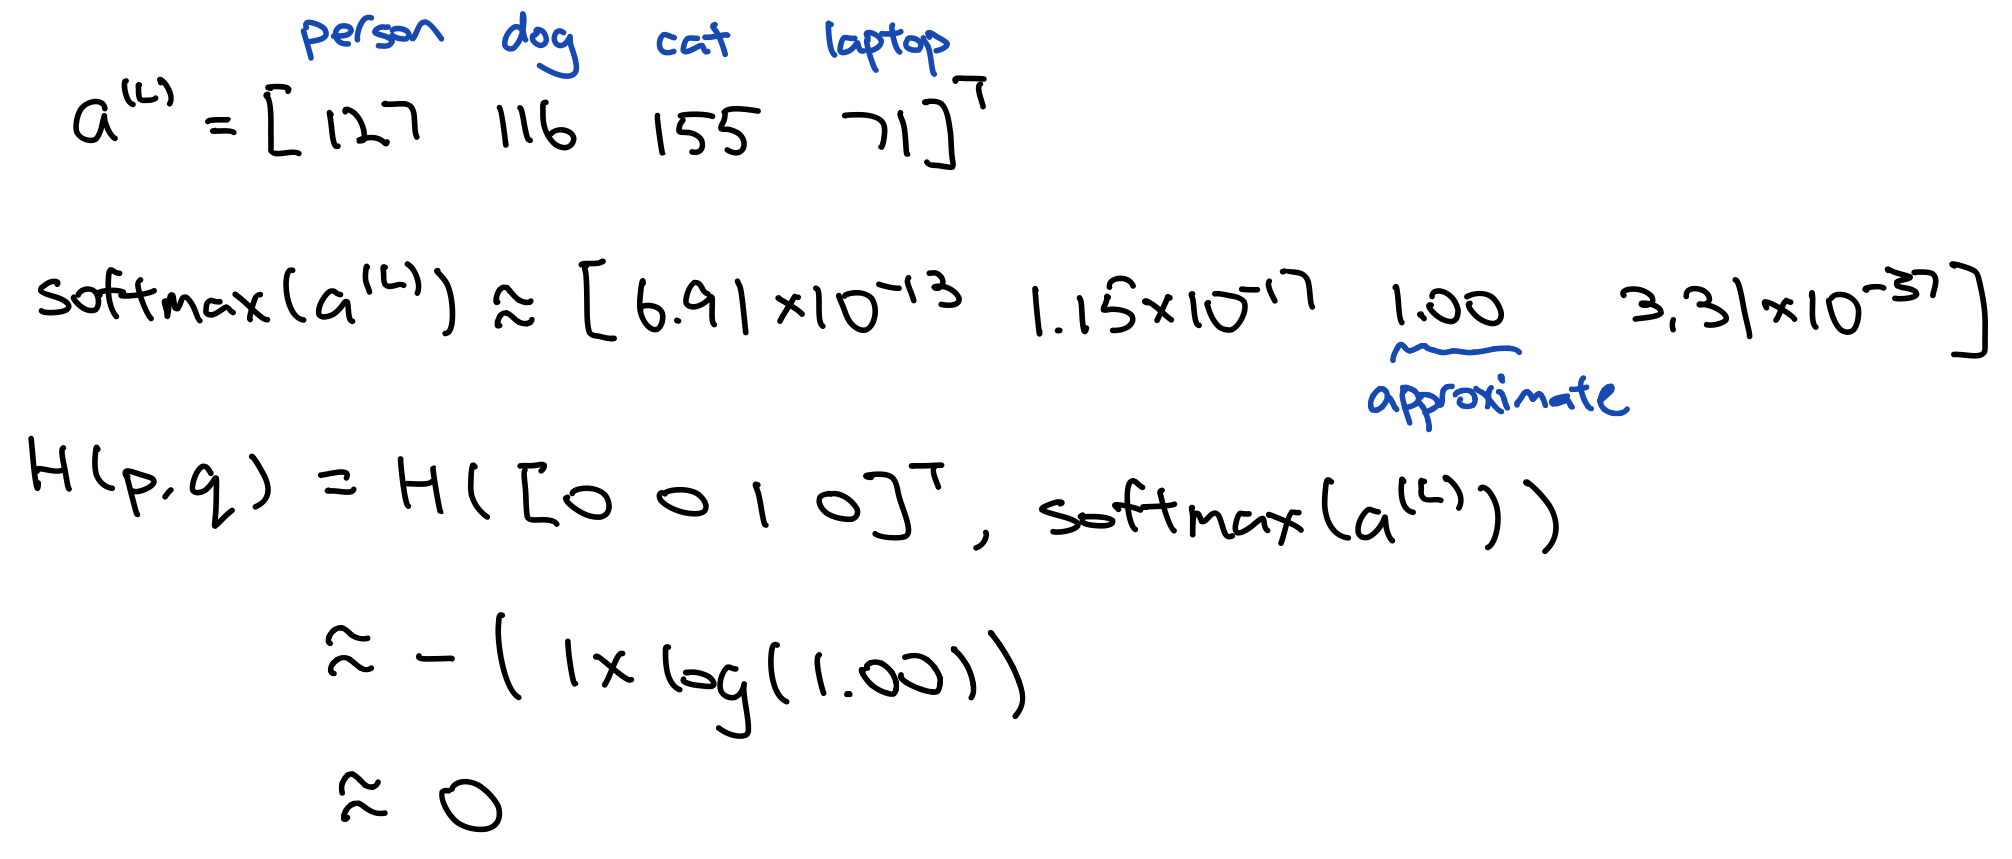

In [22]:
Image('/content/2-a.jpeg')

## (b) [10 Points] Proving CE+Softmax link

Prove that the cross-entropy loss will never be equivalent to zero under the softmax activation.

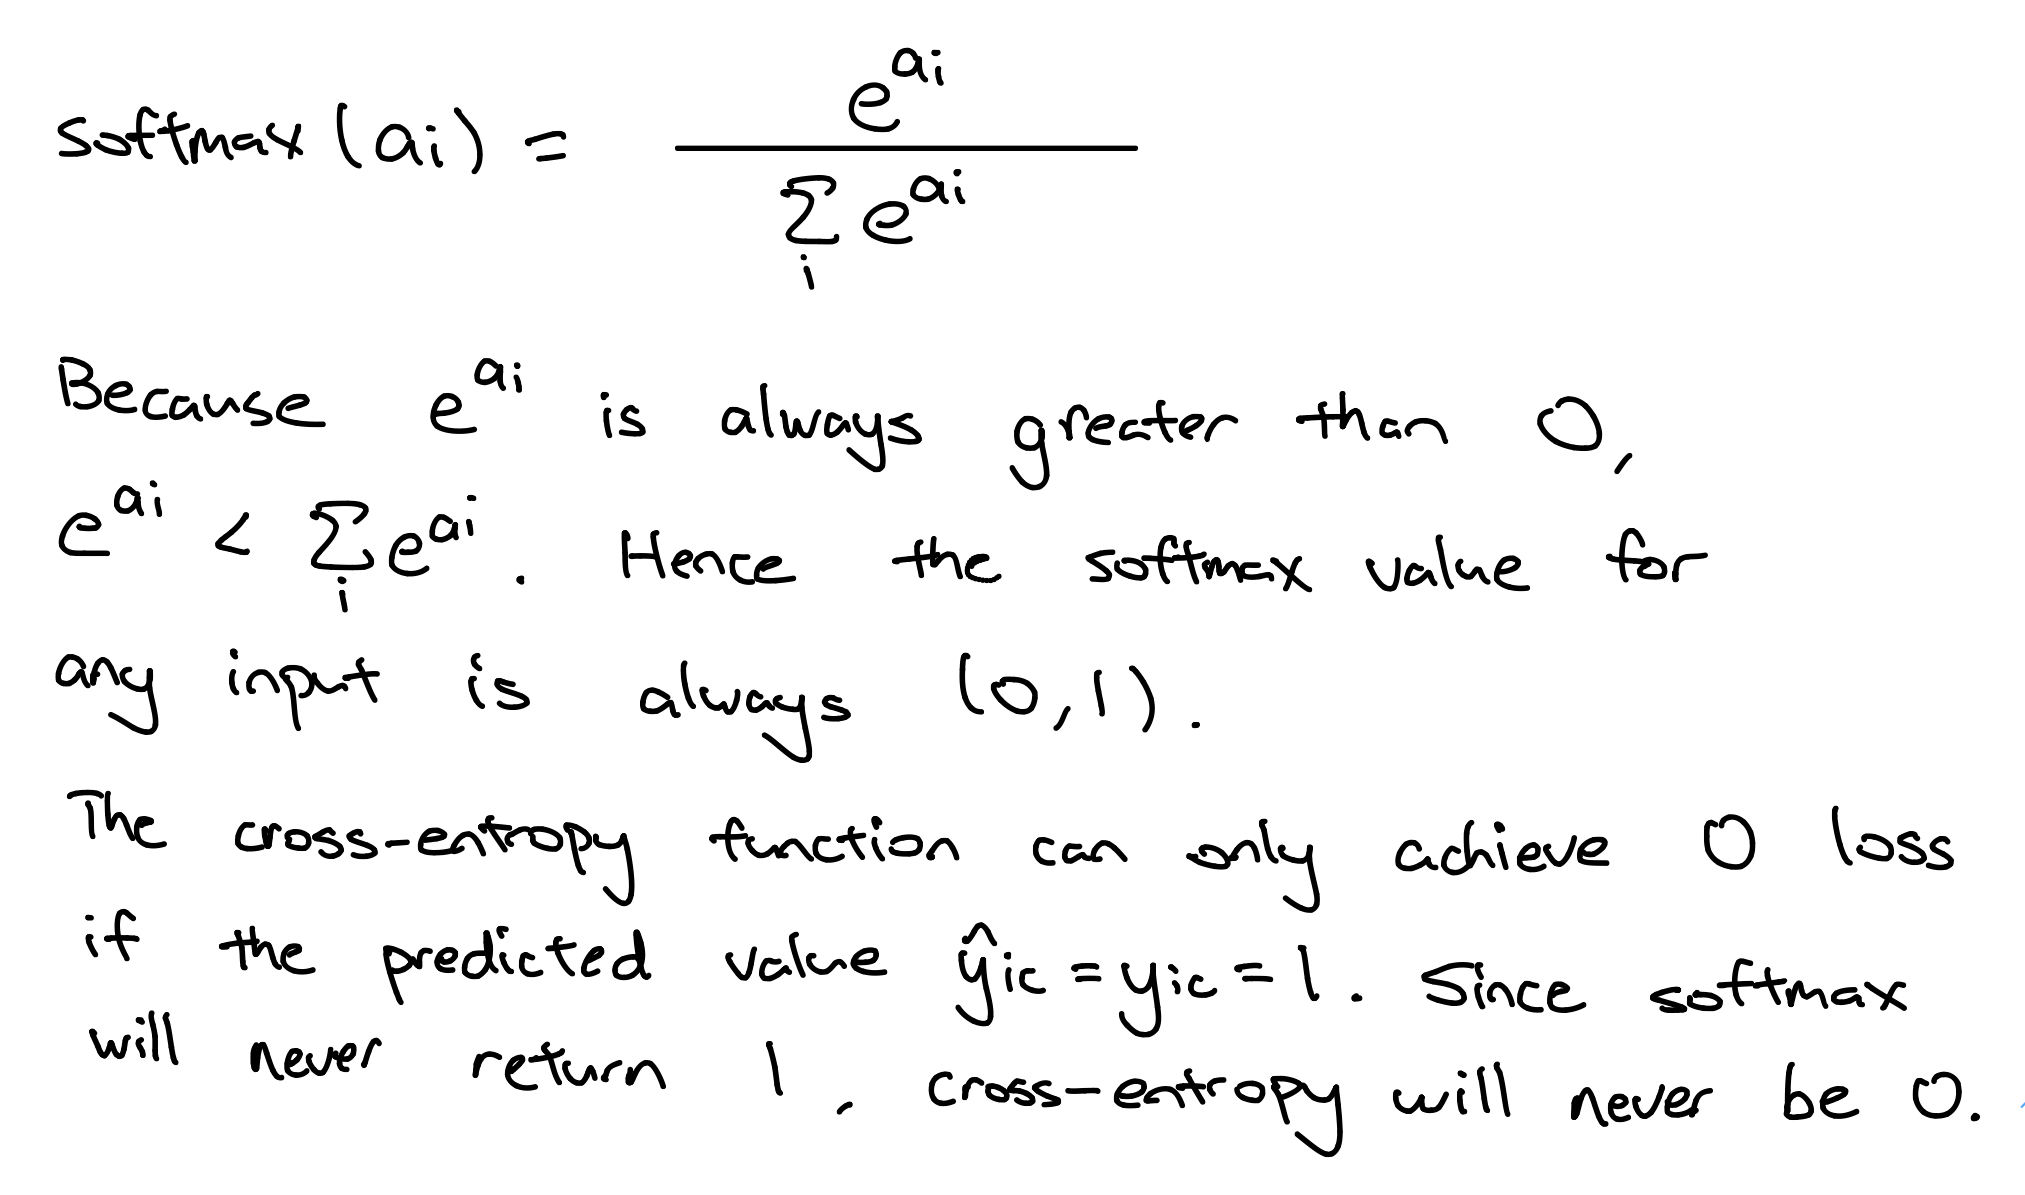

In [23]:
Image('/content/2-b.jpeg')

## (c) [5 Points] Regularized Cost

If the network architecture had two layers, say $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$, what would happen to the cross-entropy cost function under regularization? In particular, write out the new cost functions $J_{L^2}(\mathbf{W})$ and $J_{L^1}(\mathbf{W})$. Describe how the weights trained with $L^1$ would differ from weights trained with $L^2$.


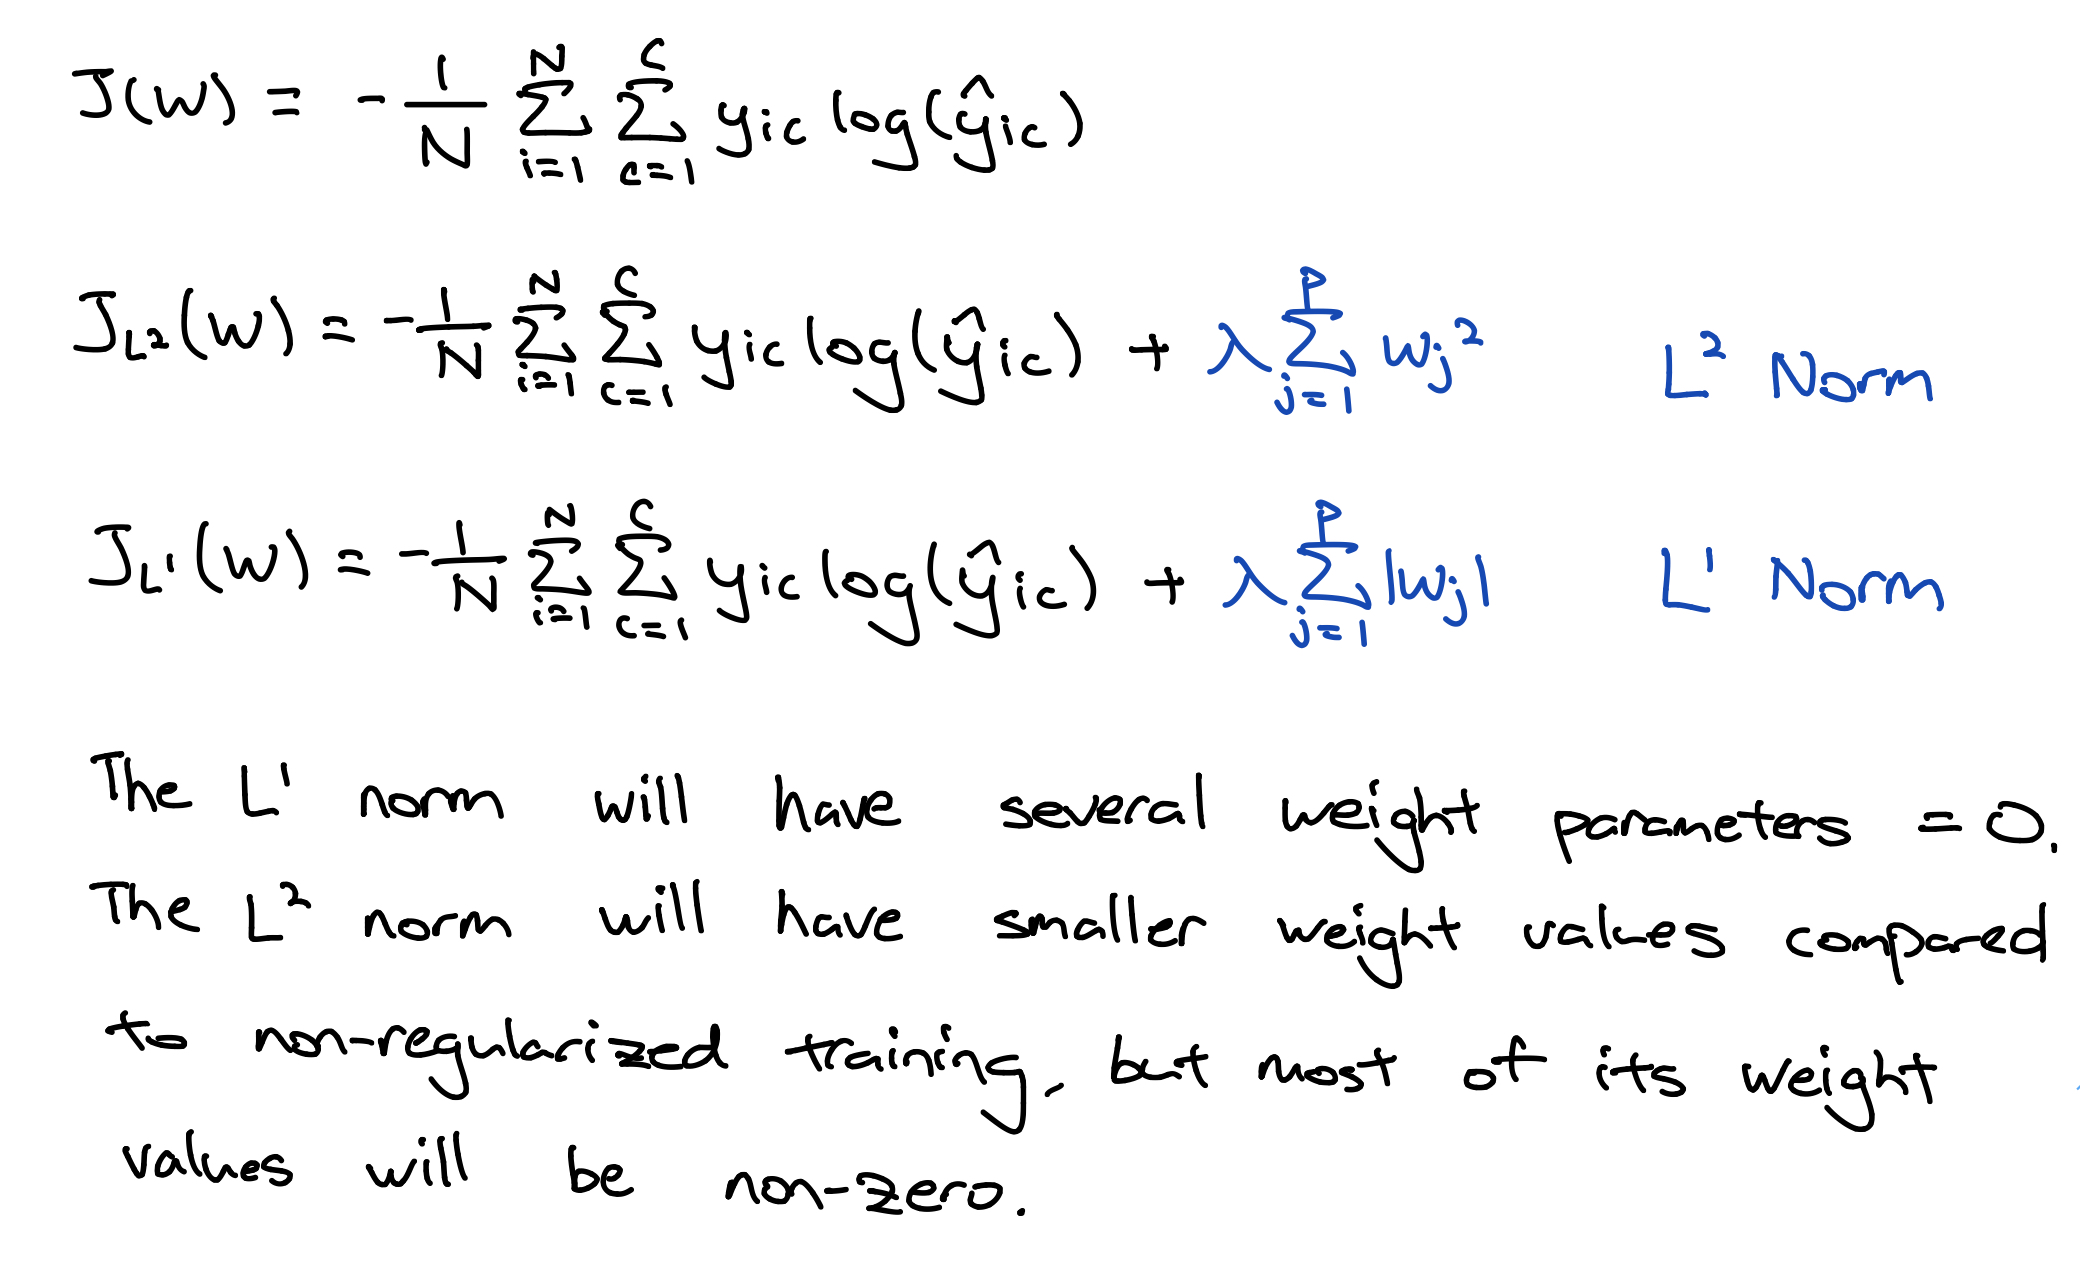

In [5]:
Image('/content/2-c.jpeg')

# [40 Points] Exercise 3 - Grendel the destroyer and devourer of our human kind

## (a) [10 points] "The dress"

![](https://upload.wikimedia.org/wikipedia/en/a/a8/The_Dress_%28viral_phenomenon%29.png)

In this exercise, the goal is to answer the age old question of whether "the dress" is coloured black and royal blue, or white and gold. To do so, the image will need to be normalized on the RGB scale. 

That is, given an image the RGB values at pixel $x \times y$ are identified as: 

$$\mathrm{Image}(x, y) = (R, G, B)$$

The normalized equivalent is:

$$
\begin{align*}
\mathrm{Total} &= R + G + B \\
R' &= \dfrac{R}{\mathrm{Total}} \times 255 \\
G' &= \dfrac{G}{\mathrm{Total}} \times 255 \\
B' &= \dfrac{B}{\mathrm{Total}} \times 255 \\
\mathrm{ImageNormalized}(x, y) &= (R', G', B')
\end{align*}
$$


In [82]:
img_pixels.shape

(300, 225, 3)

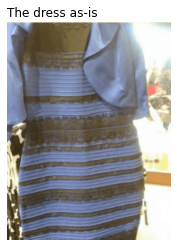

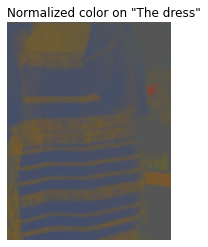

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import imageio
from PIL import Image


# Load Dress
img_dress = imageio.imread(
    'https://upload.wikimedia.org/wikipedia/en/a/a8/The_Dress_%28viral_phenomenon%29.png'
  )

# Disable axes
plt.title(f'The dress as-is', loc = "left")
plt.axis('off')
plt.imshow(img_dress)
plt.show()

# Retrieve pixels
img_pixels = np.asarray(img_dress)

# ... code here ...

img_pixels = img_pixels[:,:,:3]
img_pixels = img_pixels / np.sum(img_pixels, axis = -1).reshape(300,225,1) * 255

# ... end code ... 

# Graph the normalized image
img_dress_normalized = Image.fromarray(img_pixels.astype(np.uint8))
plt.title(f'Normalized color on "The dress"', loc = "left")
plt.axis('off')
plt.imshow(img_dress_normalized)
plt.show()

## (b) [10 points] Augmenting CIFAR-10 

In this exercise, you will augment the CIFAR-10 data set. This data set contains 10 classes that should be labeled on each image.


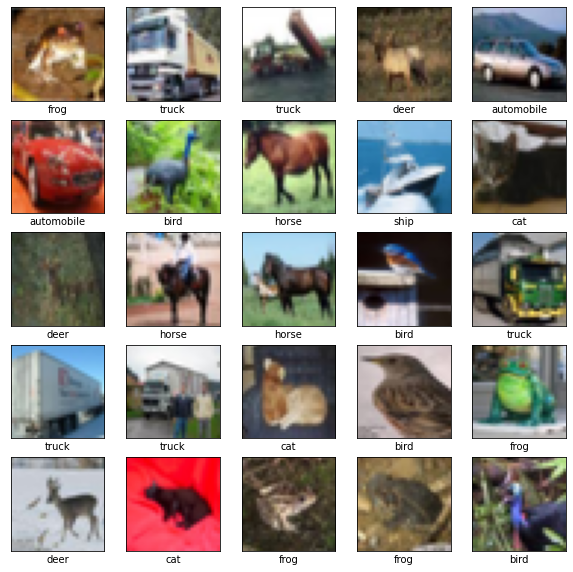

In [128]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Pre-process the data by standardizing the image pixels using:

$$\mathrm{Image}(data) = \dfrac{data - \mathrm{mean}(data)}{\mathrm{sd}(data)}$$

Then, perform data augmentation by randomly selecting **150** images from the existing data set and generating new images under the following transformations:

- Resize the image by either cropping or padding the image by adding 8 pixels to the existing height and width. 
- Crop the image to a predefined size of 32 x 32 x 3 (Height x Width x Color Channels)
- Randomly flip the image either left or right horizontally.

**Show the transformations done to create one image.**


In [98]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
# code here

# standardize image pixels
for dataset in [x_train, x_test]:
    for image_id in range(dataset.shape[0]):
        for channel in range(3):
            image = dataset[image_id,:,:,channel]
            dataset[image_id,:,:,channel] = (image - np.mean(image)) / (np.std(image) + 0.000001)



In [0]:
# augmentation
augment_indexes = np.random.randint(x_train.shape[0], size = 150)

new_images = []
for aug_idx in augment_indexes:
    np_image = x_train[aug_idx]
    pil_img = Image.fromarray(np_image)
    pil_img.crop()

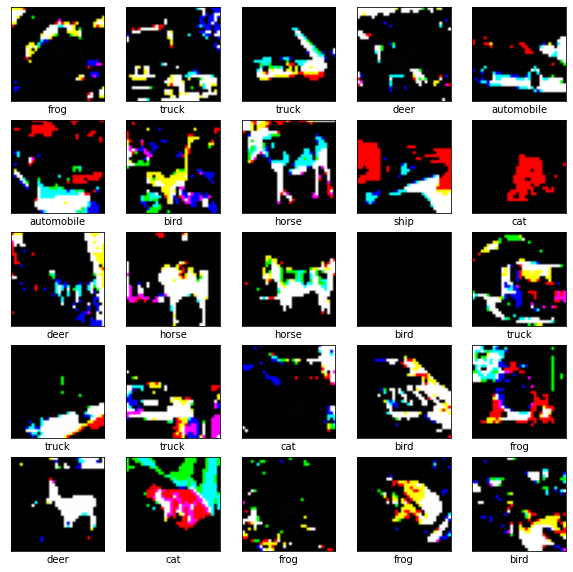

In [130]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## (c) [20 Points] Fitting to CIFAR-10

Using the CIFAR-10 data combined with the newly created data in **(b)**, construct and train a neural network using **Keras** that has the following structure:

- CONV2D layer with 16 filters with dimensions 3 x 3 and activation of ReLU
- MAXPOOL2D layer with a filter of 2x2
- CONV2D layer with 32 filters with dimensions 3 x 3 and activation of TanH
- MAXPOOL2D layer with a filter of 2x2
- CONV2D layer with 64 filters with dimensions 3 x 3 and activation of TanH
- MAXPOOL2D layer with a filter of 2x2
- DENSE or FC layer with 64 neurons and activation of ReLU
- DENSE or FC layer with 10 neurons and activation of Linear

Show the model layer information.

Use the `RMSprop` optimization technique with the `SparseCategoricalCrossentropy` loss function on a metric of `accuracy`.

Train for **20 epochs**.

Helpful Documentation References: 

- [CONV2D Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [MAXPOOL 2D Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)
- [DENSE Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)
- [RMSprop optimization technique](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop)

In [109]:
# code here ... 
from keras import models, layers

model = models.Sequential([
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu",
                  input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "tanh"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "tanh"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)                  
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)              

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
model.compile(
    optimizer = optimizers.RMSprop(learning_rate=1e-4),
    loss = losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

model_trained = model.fit(x_train, y_train, epochs = 20, batch_size = 10000, validation_split=0.2)

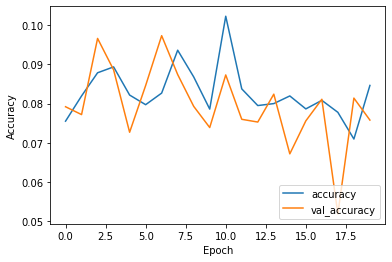

In [120]:
# Graph the model's performance here
plt.plot(model_trained.history['accuracy'], label='accuracy')
plt.plot(model_trained.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# [20 Points] Exercise 4 - Backprop another day

Consider a three layer network given as:

$$
\mathbf{z}^{(1)} = \begin{bmatrix}
w_{11}^{(1)} & w_{12}^{(1)} \\
w_{21}^{(1)} & w_{22}^{(1)} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix}, \,
\mathbf{a}^{(1)} = \begin{bmatrix}
a_1^{(1)} \\
a_2^{(1)} 
\end{bmatrix} = \begin{bmatrix}
\mathrm{ReLU}(z_1^{(1)}) \\
\mathrm{ReLU}(z_2^{(1)}) \\
\end{bmatrix} \\
\mathbf{z}^{(2)} = \begin{bmatrix}
w_{11}^{(2)} & w_{12}^{(2)} \\
w_{21}^{(2)} & w_{22}^{(2)} \\
\end{bmatrix}
\begin{bmatrix}
a_1^{(1)} \\
a_2^{(1)} \\
\end{bmatrix}, \,
\mathbf{a}^{(2)} = \begin{bmatrix}
a_1^{(2)} \\
a_2^{(2)} 
\end{bmatrix} = \begin{bmatrix}
\sigma(z_1^{(2)}) \\
\sigma(z_2^{(2)}) \\
\end{bmatrix} \\
\mathbf{z}^{(3)} = \begin{bmatrix}
w_{11}^{(3)} & w_{12}^{(3)} \\
\end{bmatrix}
\begin{bmatrix}
a_1^{(2)} \\
a_2^{(2)} \\
\end{bmatrix}, \,
\mathbf{a}^{(3)} = \begin{bmatrix}
a_1^{(3)} 
\end{bmatrix} = \begin{bmatrix}
z_1^{(3)} \\
\end{bmatrix} = y
$$




## (a) [5 Points] Sketch the fully connected neural network diagram

Translate the above equations into a neural network diagram.


## (b) [15 Points] Compute Partial Derivatives


Compute the partial derivative for the **entire layer**:
 
$\dfrac{\partial y}{\partial \mathbf{z}^{(2)}}$


... answer here ...

-----
Recompute the partial derivative for **a single neuron** in the layer:

$\dfrac{\partial y}{\partial z_1^{(2)}}$


_Hint:_ You just calculated this!

... answer here ...

----
Calculate the partial derivative for:
 
$\dfrac{\partial y}{\partial \mathbf{z}^{(1)}}$


... answer here ...

----

Lastly, derive the partial derivative of: 

$\dfrac{\partial y}{\partial \mathbf{W}^{(1)}}$

... answer here ...

# [15 Points] Exercise 5 - #YOLO ALMA

In this exercise, we'll try to classify everyday objects from the
[Alma webcam](https://illinois.edu/about/almacam.html) and [Quadcam](https://illinois.edu/about/quadcam.html) using the [You Only Look Once (YOLO) v3 CNN](https://pjreddie.com/darknet/yolo/).

Prior to beginning this problem, please make sure that a **GPU is enabled** by going to:

```
Runtime -> Change runtime type -> Hardware Accelerator -> GPU
```

Next, please run the following setup code to setup the environment for predicting with YOLO v3. In-depth instructions follow immediately after the setup code.

## Setup Code 

Portions of the setup code are based on [yolov3-tf2](https://colab.research.google.com/github/zzh8829/yolov3-tf2/blob/master/colab_gpu.ipynb) document. Further modifications were made to simply the process of initializing the model. Please run each code chunk in order. Failure to do so may result in issues when trying to detect an image with YOLO v3.

In [0]:
# 1. Setup the model environment
!git clone https://github.com/zzh8829/yolov3-tf2
%cd yolov3-tf2/
!pip install -r requirements-gpu.txt

In [0]:
# 2. Retrieve the pretrained model
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights
!python convert.py

In [0]:
# Change into the yolov3-tf2 directory
# Failure to do so will result in checkpoints not being found.
%cd yolov3-tf2/
!ls

In [0]:
# 3. Structure the YOLO model 
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import requests
%tensorflow_version 2.x
import tensorflow as tf
from yolov3_tf2.models import (
    YoloV3, YoloV3Tiny
)
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

# Ensure no duplicate flags exist if code chunk is re-run multiple times.
def del_all_flags():
    for name in list(flags.FLAGS):
        if name in ['classes', 'weights', 'tiny',
                    'size', 'image', 'tfrecord', 'output',
                    'num_classes']: 
            delattr(flags.FLAGS, name)

del_all_flags()
# Remove flags

# Define set of flags required for processing data.
flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf',
                    'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

# Explicitly request flags be parsed prior to accessing them in the next code chunk.
# https://github.com/google/python-gflags/issues/37#issuecomment-297800637
FLAGS([sys.argv])

# Verify that a GPU is available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print("GPU Detected ...")
else:
  print("GPU not found ... \n\
         Please make sure to enable a GPU prior to continuing.\
         Follow notes at the start of the problem")

In [0]:
# Bring online the model
if FLAGS.tiny:
    yolo = YoloV3Tiny(classes=FLAGS.num_classes)
else:
    yolo = YoloV3(classes=FLAGS.num_classes)

# Ensure model loads correctly
yolo.load_weights(FLAGS.weights).expect_partial()
print('Loaded: weights ... ')

class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
print('Loaded: classes ... ')


## (a) [10 Points] Detecting Objects

In this exercise, we're interested in detecting within images from the Alma mater webcam and the quad cam these objects:

- person
- bicycle
- backpack
- dog
- bird

Obtain the images from:

 - https://fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-`{1-8}`.png
 - https://fdl.thecoatlessprofessor.com/hw/hw05/quad-cam-`{1-3}`.jpeg

where `{1-8}` represents numbers `1`, `2`, ... , and `8`. So, the first image can be retrieved with:

```
https://fdl.thecoatlessprofessor.com/hw/hw05/alma-cam-1.png
```

Construct a Pandas dataframe that contains the ImageID and a count of each object under the given class. e.g.

| ImageID | Person | Bicycle | Backpack | Dog | Bird         |
|:--------|--------|---------|----------|-----|--------------|

To help in this endeavor, the author has made available a set of functions to  model with the existing network. Please use these functions to load images and model the data.


Detections ...
	person, 0.9997697472572327, [0.06754473 0.03718695 0.967988   0.96507525]
	chair, 0.9267330169677734, [0.01851872 0.34200275 0.17385134 0.62783295]


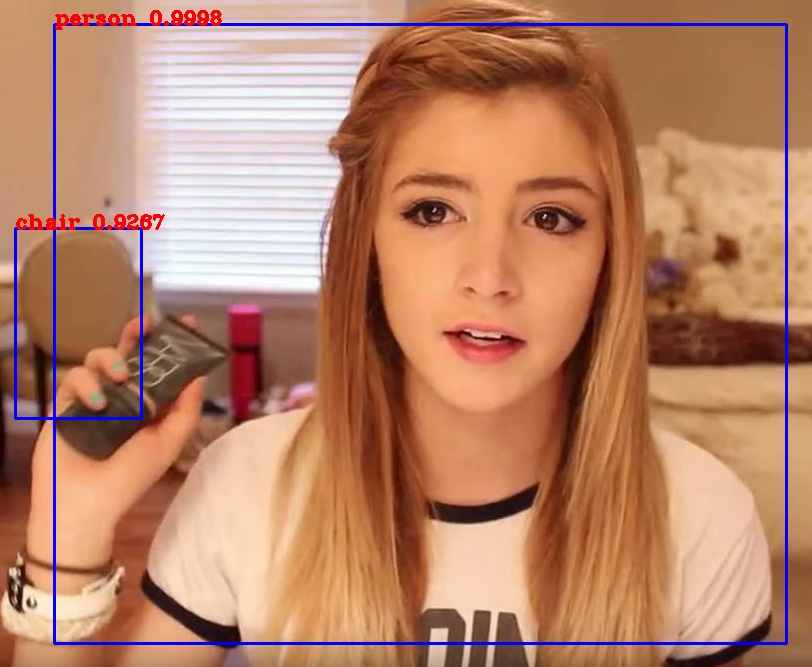

In [0]:
# Retrieve image from online
def download_img(url):
  return requests.get(url).content

# Internal function that pads the image with an additional dimension
# such that an image goes from height x width to examples x height x width
# and standardize the image with a fixed size
def clean_img(img_raw, img_size = FLAGS.size):
  # Expand dimension to obtain a single image
  img = tf.expand_dims(img_raw, 0)
  # Transform image to specific size
  img = transform_images(img, img_size)
  return img

# Load the image downloaded from the internet
def load_img_binary(img_dl, channels = 3, img_size = FLAGS.size):
  img_raw = tf.image.decode_image(img_dl, channels = channels)
  img = clean_img(img_raw, img_size)
  return img, img_raw
  
# Load the image found locally
def load_img_file(path, channels = 3, img_size = FLAGS.size):
  # Load image file from path
  img = load_img_binary(open(path, 'rb').read(), 
                        channels, img_size)
  return img, img_raw

# Perform a classification with the YOLO network
def classify_img(img, yolo):
  t1 = time.time()
  boxes, scores, classes, nums = yolo(img)
  t2 = time.time()
  print(f'Elapsed time: {t2 - t1} ...')
  return boxes, scores, classes, nums

# Traceback of the detections found in the image
# Useful for understanding what was detected in a single image
def img_detect(boxes, scores, classes, nums, class_names):
  print('Detections ...')
  for i in range(nums[0]):
    classes_found = class_names[int(classes[0][i])]
    class_confidence = np.array(scores[0][i])
    box_outline = np.array(boxes[0][i])
    print(f'\t{classes_found}, {class_confidence}, {box_outline}')

# Render the image with detected object in boxes
def img_draw_boxes(img, img_raw, boxes, scores, classes, nums, class_names):
  img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
  img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
  from IPython.display import Image, display
  display(Image(data=bytes(cv2.imencode('.jpg', img)[1]), width=800))

# Example image download and read 
img, img_raw = load_img_binary(
    download_img("https://blogs.illinois.edu/files/6231/545166/117021.jpg")
)


## (b) [5 Points] Upload and run your own image! 

In this exercise, you will repeat the prior exercise but instead you will select the classes that should be detected from an image you supply.

View all possible classes by exploring the [data/coco.names](https://github.com/pjreddie/darknet/blob/master/data/coco.names) class names file.

If you "tweet" or share your classified image on social media, send me a link and I'll make sure to like/share it!

In [0]:
# Code to insert an image from drive...

# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

# Upload image
from google.colab import files
uploaded = files.upload()
from IPython.display import Image

In [0]:
# ... code here ... 